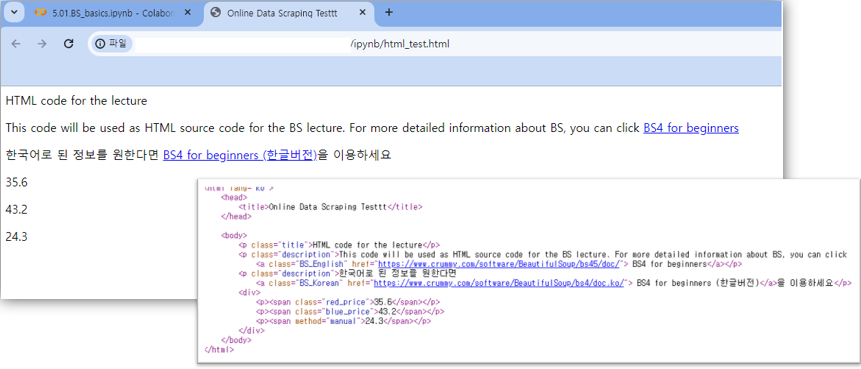

In [1]:
# html_test.html에서 소스 코드를 읽어옴
with open('html_test.html', 'r', encoding = 'utf-8') as f: # 'r' 읽기 모드로 오픈
    html = f.read() # f.read()는 파일의 전체 내용을 문자열로 읽어오는 메서드
    # with 문의 컨텍스트 내에서 실행(들여쓰기... 코드 블록을 구분)

# open : Python 내장 함수로, 별도의 패키지 임포트 없이 사용 (설치 필요 없음)
   # Python의 기본 입출력(I/O) 기능을 제공하는 내장 라이브러리인 io 모듈에 속함. 파일을 열고 읽거나 쓰기 위한 기능 제공
   # with 키워드와 함께 사용, 파일 작업이 완료된 후 자동으로 파일을 닫아 줌

In [2]:
# 소스 코드 출력
print(html)

<html lang="ko"> 
	<head>
		<title>Online Data Scraping Testtt</title>
	</head>

	<body>
		<p class="title">HTML code for the lecture</p>
		<p class="description">This code will be used as HTML source code for the BS lecture. For more detailed information about BS, you can click
			<a class="BS_English" href="https://www.crummy.com/software/BeautifulSoup/bs45/doc/"> BS4 for beginners</a></p>
		<p class="description">한국어로 된 정보를 원한다면
			<a class="BS_Korean" href="https://www.crummy.com/software/BeautifulSoup/bs4/doc.ko/"> BS4 for beginners (한글버전)</a>을 이용하세요</p>
		<div>
			<p><span class="red_price">35.6</span></p>
			<p><span class="blue_price">43.2</span></p>
			<p><span method="manual">24.3</span></p>
		</div>
	</body>
</html>





## BeautifulSoup 클래스 사용하기

In [4]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(html, 'lxml') #  BeautifulSoup 클래스의 인스턴스를 생성
       # html : 파싱 대상(HTML 문서의 내용을 담고 있는 변수),
       # lxml': 사용할 파서(parser)의 종류 지정


### 태그의 이름을 이용해서 태그 찾기


title 태그 찾기

In [63]:
soup.body.p.children

In [6]:
soup.title.text

'Online Data Scraping Testtt'

첫 번째 p 태그 찾기

In [35]:
soup.p

<p class="title">HTML code for the lecture</p>

In [53]:
# Q. 두번째 태그는???
soup.find_all("p")[1]

<p class="description">This code will be used as HTML source code for the BS lecture. For more detailed information about BS, you can click
			<a class="BS_English" href="https://www.crummy.com/software/BeautifulSoup/bs45/doc/"> BS4 for beginners</a></p>

### find() 또는 find_all() 함수 사용하기

In [9]:
# 태그의 이름을 찾고자 하는 태그의 조건으로 입력
soup.find('title')

<title>Online Data Scraping Testtt</title>

In [10]:
# 태그를 찾은 후, 텍스트 정보를 추출을 위해 text 키워드 사용
soup.find('title').text

'Online Data Scraping Testtt'

In [11]:
soup.find('p')

<p class="title">HTML code for the lecture</p>

In [12]:
soup.find('p').text

'HTML code for the lecture'

### 태그의 속성 정보 이용하기

find() 함수의 경우

In [13]:
# 태그의 속성 정보를 인자로 입력하기 위해서 attrs 파라미터 사용
soup.find('span', attrs={'class':'blue_price'})

<span class="blue_price">43.2</span>

In [75]:
soup.findAll('span', attrs={'method':'manual'})

[<span method="manual">24.3</span>]

In [14]:
soup.find('span',attrs={'class':'blue_price'}).text

'43.2'

### find_all() 함수 사용하기

In [15]:
# 아래와 같이 입력하면 두 번째 p 태그를 찾습니다.
soup.find('p', attrs={'class':'description'})

<p class="description">This code will be used as HTML source code for the BS lecture. For more detailed information about BS, you can click
			<a class="BS_English" href="https://www.crummy.com/software/BeautifulSoup/bs45/doc/"> BS4 for beginners</a></p>

In [16]:
# 아래와 같이 입력하면 해당 조건을 만족하는 두 개의 p 태그가 모두 찾아지고,
# 그 결과가 리스트 형태로 반환
soup.find_all('p', attrs={'class':'description'})

[<p class="description">This code will be used as HTML source code for the BS lecture. For more detailed information about BS, you can click
 			<a class="BS_English" href="https://www.crummy.com/software/BeautifulSoup/bs45/doc/"> BS4 for beginners</a></p>,
 <p class="description">한국어로 된 정보를 원한다면
 			<a class="BS_Korean" href="https://www.crummy.com/software/BeautifulSoup/bs4/doc.ko/"> BS4 for beginners (한글버전)</a>을 이용하세요</p>]

In [79]:
# 인덱스 번호 1을 사용해서 두 번째 원소에 접근
soup.find_all('p', attrs={'class':'description'})[1]

<p class="description">한국어로 된 정보를 원한다면
			<a class="BS_Korean" href="https://www.crummy.com/software/BeautifulSoup/bs4/doc.ko/"> BS4 for beginners (한글버전)</a>을 이용하세요</p>

In [18]:
#Q. 아래 코드 실행 결과?
soup.find_all('span')[-1].text

'24.3'

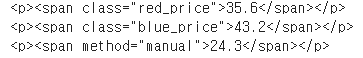

In [77]:
# [-1] 반환된 리스트에서 마지막 요소를 선택
# 음수 인덱스를 사용 리스트의 끝에서부터 역순으로 요소를 참조
# -1은 가장 마지막 요소, 즉 찾은 <span> 태그들 중에서 마지막 태그를 의미
soup.find_all('span')[-2].text #Q -2는?

'43.2'

## Navigation 기능 사용하기

자식 태그에 접근하기

In [20]:
# contents: head 태그의 모든 자식 원소를 리스트 형태로 반환합니다.
soup.head.contents

['\n', <title>Online Data Scraping Testtt</title>, '\n']

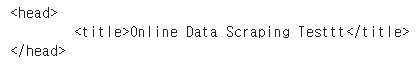

In [21]:
soup.head.contents[1]

<title>Online Data Scraping Testtt</title>

In [22]:
soup.head.contents[1].text

'Online Data Scraping Testtt'

부모 태그에 접근하기

In [23]:
soup.title.parent

<head>
<title>Online Data Scraping Testtt</title>
</head>

형제자매 태그에 접근하기

In [24]:
soup.find('p',attrs={'class':'title'})

<p class="title">HTML code for the lecture</p>

In [25]:
# 아래 코드는 '\n'을 반환
soup.find('p',attrs={'class':'title'}).next_sibling

'\n'

In [26]:
# 그 다음 p 태그에 접근하기 위해서는 next_sibling 키워드를 다시 한번 적용
soup.find('p',attrs={'class':'title'}).next_sibling.next_sibling

<p class="description">This code will be used as HTML source code for the BS lecture. For more detailed information about BS, you can click
			<a class="BS_English" href="https://www.crummy.com/software/BeautifulSoup/bs45/doc/"> BS4 for beginners</a></p>

## 태그 속성의 값 추출하기: get() 함수 사용

In [80]:
# get() 함수의 인자로 추출하고자 하는 값을 저장하고 있는 속성의 이름을 입력
soup.a.get('href')

'https://www.crummy.com/software/BeautifulSoup/bs45/doc/'

In [28]:
# # 두 번째 p 태그
all_p_tags = soup.find_all('p') # 문서 내의 모든 p 태그를 포함하는 리스트

In [29]:
second_p_tag = soup.find_all('p')[1]
print(second_p_tag)

<p class="description">This code will be used as HTML source code for the BS lecture. For more detailed information about BS, you can click
			<a class="BS_English" href="https://www.crummy.com/software/BeautifulSoup/bs45/doc/"> BS4 for beginners</a></p>


In [4]:
html_content = '''
<!DOCTYPE html>
<html>
<head>
    <title>웹 크롤링 예제</title>
</head>
<body>
    <h1>웹 크롤링 학습</h1>
</body>
</html>
'''

In [8]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_content, 'html.parser')

title_tag = soup.title
print(title_tag.text)

웹 크롤링 예제
